# 02-noisy-circle

Estimate circle parameters using [numpy.linalg.lstsq](https://numpy.org/doc/2.1/reference/generated/numpy.linalg.lstsq.html) (same as "01-noisy-line" except that linearization is required for non linear equations)


t=0: X=[2.01008149 3.01567474 6.30978269] (loss=149197.50294049733)
t=1: X=[2.01008149 3.01567474 5.11647135] (loss=149197.50294049756)
t=2: X=[2.01008149 3.01567474 4.97731373] (loss=149197.50294049704)
t=3: X=[2.01008149 3.01567474 4.97536842] (loss=149197.50294049698)
t=4: X=[2.01008149 3.01567474 4.97536804] (loss=149197.50294049704)
t=5: X=[2.01008149 3.01567474 4.97536804] (loss=149197.50294049695)
t=6: X=[2.01008149 3.01567474 4.97536804] (loss=149197.50294049698)
t=7: X=[2.01008149 3.01567474 4.97536804] (loss=149197.50294049698)
t=8: X=[2.01008149 3.01567474 4.97536804] (loss=149197.50294049698)
t=9: X=[2.01008149 3.01567474 4.97536804] (loss=149197.50294049698)


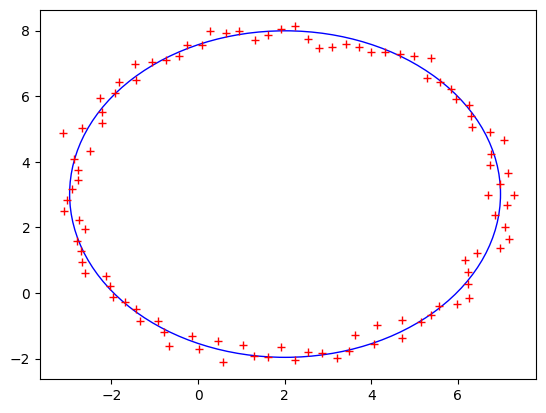

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create N points on circle with cx=2, cy=3 and r=5
N=100
theta = np.linspace(0., 2.0 * np.pi, N)
radius = 5. + 0.2 * np.random.randn(N)
x = 2 + radius * np.cos(theta)
y = 3 + radius * np.sin(theta)

# Look for X so that F(X) = 0 with :
# F(X) = ( x - cx ) ^ 2 + ( y - cy ) ^ 2 - r^2

# Linearize as follow :
# F(X0) + dX * F'(X0) = 0

# X0 estimation with X=[cx, cy, r]
X = np.array([0.0,0.0,1.0])

num_epoch = 10
for t in range(num_epoch):
    FX0 = np.square(x - X[0]) + np.square(y - X[1]) - X[2]**2

    A = np.column_stack((
        - 2. * ( x - X[0] ),     # dF(X) / dcx = - 2 * ( x - cx )
        - 2. * ( y - X[1] ),     # dF(X) / dcy = - 2 * ( y - cy )
        - 2.0 * np.full(N,X[2])  # dF(X) / dr  = - 2 * r
    ))

    dX, residual = np.linalg.lstsq(A,-FX0,rcond=None)[:2]
    X = X + dX
    loss=np.square(residual).sum()
    print(f't={t}: X={X} (loss={loss})')


# Plot results
plt.plot(x, y, 'r+', label='data')
circle = plt.Circle((X[0], X[1]), X[2], color='b', fill=False)
plt.gcf().gca().add_artist(circle)
plt.show()
